In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
p = 0.01

df = pd.read_csv(
    './DADOS/MICRODADOS_ENEM_ESCOLA.csv',
    header=0,
    encoding = "ISO-8859-1",
    sep=';',
    dtype={'INSE': 'string'}
)

df.head()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,...,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,...,NaN,NaN,69.03,<NA>,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,...,NaN,NaN,57.82,<NA>,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,...,NaN,NaN,64.83,<NA>,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,...,72.16,60.02,NaN,<NA>,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,...,NaN,NaN,58.84,<NA>,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos


In [3]:
df.shape

(172305, 27)

In [4]:
df.isnull().sum()/df.shape[0]*100

NU_ANO                        0.000000
CO_UF_ESCOLA                  0.000000
SG_UF_ESCOLA                  0.000000
CO_MUNICIPIO_ESCOLA           0.000000
NO_MUNICIPIO_ESCOLA           0.000000
CO_ESCOLA_EDUCACENSO          0.000000
NO_ESCOLA_EDUCACENSO          0.000000
TP_DEPENDENCIA_ADM_ESCOLA     0.000000
TP_LOCALIZACAO_ESCOLA         0.000000
NU_MATRICULAS                 0.000000
NU_PARTICIPANTES_NEC_ESP     73.677490
NU_PARTICIPANTES              0.000000
NU_TAXA_PARTICIPACAO         39.243202
NU_MEDIA_CN                  39.243202
NU_MEDIA_CH                  39.243202
NU_MEDIA_LP                  39.243202
NU_MEDIA_MT                  39.243202
NU_MEDIA_RED                 28.353211
NU_MEDIA_OBJ                 88.889469
NU_MEDIA_TOT                 71.867328
INSE                         90.948028
PC_FORMACAO_DOCENTE          73.697803
NU_TAXA_PERMANENCIA          82.081193
NU_TAXA_APROVACAO             9.912075
NU_TAXA_REPROVACAO            9.912075
NU_TAXA_ABANDONO         

In [5]:
df = df.drop(columns=['INSE', 'NU_MEDIA_OBJ', 'NU_MEDIA_TOT', 'PC_FORMACAO_DOCENTE', 'NU_TAXA_PERMANENCIA', 'NU_PARTICIPANTES_NEC_ESP'])

In [6]:
df['MEDIA_OBJETIVA'] = (df['NU_MEDIA_CN'] + df['NU_MEDIA_CH'] + 
                        df['NU_MEDIA_LP'] + df['NU_MEDIA_MT'])/4
df['MEDIA_TOTAL'] = (df['NU_MEDIA_CN'] + df['NU_MEDIA_CH'] + df['NU_MEDIA_LP'] +
                        df['NU_MEDIA_MT'] + df['NU_MEDIA_RED'])/5

In [7]:
df.shape

(172305, 23)

In [8]:
df.isnull().sum()/df.shape[0]*100

NU_ANO                        0.000000
CO_UF_ESCOLA                  0.000000
SG_UF_ESCOLA                  0.000000
CO_MUNICIPIO_ESCOLA           0.000000
NO_MUNICIPIO_ESCOLA           0.000000
CO_ESCOLA_EDUCACENSO          0.000000
NO_ESCOLA_EDUCACENSO          0.000000
TP_DEPENDENCIA_ADM_ESCOLA     0.000000
TP_LOCALIZACAO_ESCOLA         0.000000
NU_MATRICULAS                 0.000000
NU_PARTICIPANTES              0.000000
NU_TAXA_PARTICIPACAO         39.243202
NU_MEDIA_CN                  39.243202
NU_MEDIA_CH                  39.243202
NU_MEDIA_LP                  39.243202
NU_MEDIA_MT                  39.243202
NU_MEDIA_RED                 28.353211
NU_TAXA_APROVACAO             9.912075
NU_TAXA_REPROVACAO            9.912075
NU_TAXA_ABANDONO              9.912075
PORTE_ESCOLA                  0.000000
MEDIA_OBJETIVA               39.243202
MEDIA_TOTAL                  39.463742
dtype: float64

In [9]:
# df['NU_TAXA_PARTICIPACAO'] = df['NU_TAXA_PARTICIPACAO'].fillna(df['NU_TAXA_PARTICIPACAO'].mean())
# df['NU_MEDIA_CN'] = df['NU_MEDIA_CN'].fillna(df['NU_MEDIA_CN'].mean())
# df['NU_MEDIA_CH'] = df['NU_MEDIA_CH'].fillna(df['NU_MEDIA_CH'].mean())
# df['NU_MEDIA_LP'] = df['NU_MEDIA_LP'].fillna(df['NU_MEDIA_LP'].mean())
# df['NU_MEDIA_MT'] = df['NU_MEDIA_MT'].fillna(df['NU_MEDIA_MT'].mean())
# df['NU_MEDIA_RED'] = df['NU_MEDIA_RED'].fillna(df['NU_MEDIA_RED'].mean())
# df['MEDIA_OBJETIVA'] = df['MEDIA_OBJETIVA'].fillna(df['MEDIA_OBJETIVA'].mean())
# df['MEDIA_TOTAL'] = df['MEDIA_TOTAL'].fillna(df['MEDIA_TOTAL'].mean())
# df['NU_TAXA_APROVACAO'] = df['NU_TAXA_APROVACAO'].fillna(df['NU_TAXA_APROVACAO'].mean())
# df['NU_TAXA_REPROVACAO'] = df['NU_TAXA_REPROVACAO'].fillna(df['NU_TAXA_REPROVACAO'].mean())
# df['NU_TAXA_ABANDONO'] = df['NU_TAXA_ABANDONO'].fillna(df['NU_TAXA_ABANDONO'].mean())
df = df.dropna()

In [10]:
df.isnull().sum()/df.shape[0]*100

NU_ANO                       0.0
CO_UF_ESCOLA                 0.0
SG_UF_ESCOLA                 0.0
CO_MUNICIPIO_ESCOLA          0.0
NO_MUNICIPIO_ESCOLA          0.0
CO_ESCOLA_EDUCACENSO         0.0
NO_ESCOLA_EDUCACENSO         0.0
TP_DEPENDENCIA_ADM_ESCOLA    0.0
TP_LOCALIZACAO_ESCOLA        0.0
NU_MATRICULAS                0.0
NU_PARTICIPANTES             0.0
NU_TAXA_PARTICIPACAO         0.0
NU_MEDIA_CN                  0.0
NU_MEDIA_CH                  0.0
NU_MEDIA_LP                  0.0
NU_MEDIA_MT                  0.0
NU_MEDIA_RED                 0.0
NU_TAXA_APROVACAO            0.0
NU_TAXA_REPROVACAO           0.0
NU_TAXA_ABANDONO             0.0
PORTE_ESCOLA                 0.0
MEDIA_OBJETIVA               0.0
MEDIA_TOTAL                  0.0
dtype: float64

In [11]:
df.shape

(103477, 23)

In [12]:
df.dtypes

NU_ANO                         int64
CO_UF_ESCOLA                   int64
SG_UF_ESCOLA                  object
CO_MUNICIPIO_ESCOLA            int64
NO_MUNICIPIO_ESCOLA           object
CO_ESCOLA_EDUCACENSO           int64
NO_ESCOLA_EDUCACENSO          object
TP_DEPENDENCIA_ADM_ESCOLA      int64
TP_LOCALIZACAO_ESCOLA          int64
NU_MATRICULAS                  int64
NU_PARTICIPANTES               int64
NU_TAXA_PARTICIPACAO         float64
NU_MEDIA_CN                  float64
NU_MEDIA_CH                  float64
NU_MEDIA_LP                  float64
NU_MEDIA_MT                  float64
NU_MEDIA_RED                 float64
NU_TAXA_APROVACAO            float64
NU_TAXA_REPROVACAO           float64
NU_TAXA_ABANDONO             float64
PORTE_ESCOLA                  object
MEDIA_OBJETIVA               float64
MEDIA_TOTAL                  float64
dtype: object

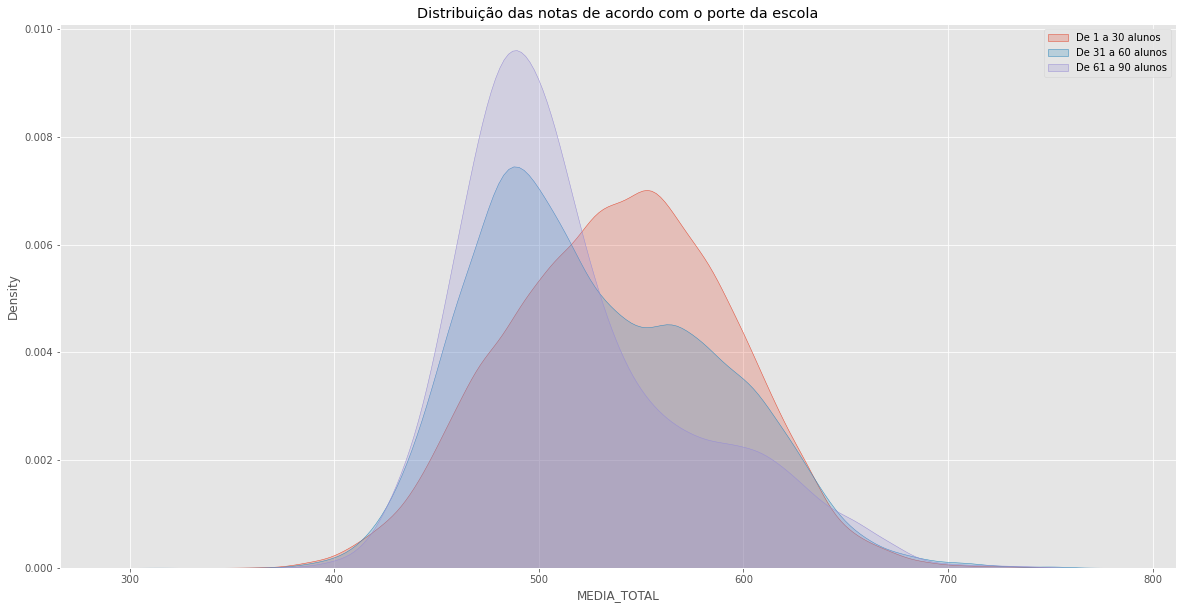

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(df.query("PORTE_ESCOLA == 'De 1 a 30 alunos'")['MEDIA_TOTAL'], ax=ax, shade=True, label='De 1 a 30 alunos') 
sns.kdeplot(df.query("PORTE_ESCOLA == 'De 31 a 60 alunos'")['MEDIA_TOTAL'], ax=ax, shade=True, label='De 31 a 60 alunos')
sns.kdeplot(df.query("PORTE_ESCOLA == 'De 61 a 90 alunos'")['MEDIA_TOTAL'], ax=ax, shade=True, label='De 61 a 90 alunos') 
sns.kdeplot(df.query("PORTE_ESCOLA == 'Maior que 90'")['MEDIA_TOTAL'], ax=ax, shade=True, label='Maior que 90 alunos') 
ax.set_title('Distribuição das notas de acordo com o porte da escola') # coloca titulo
ax.legend()
plt.show()

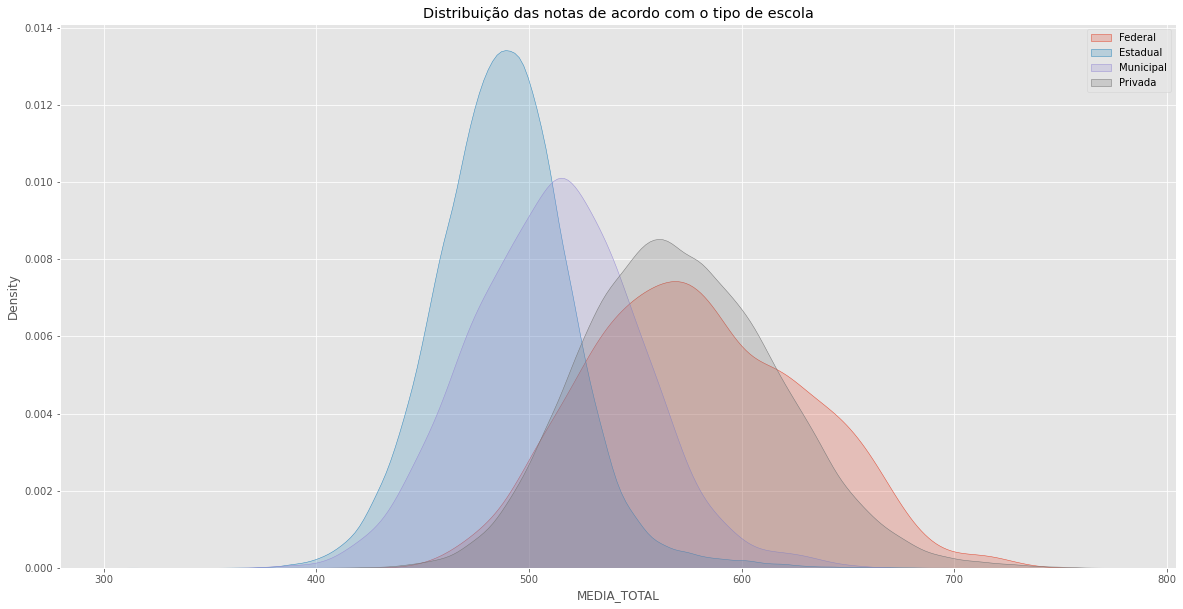

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 1")['MEDIA_TOTAL'], ax=ax, shade=True, label='Federal') 
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 2")['MEDIA_TOTAL'], ax=ax, shade=True, label='Estadual')
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 3")['MEDIA_TOTAL'], ax=ax, shade=True, label='Municipal') 
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 4")['MEDIA_TOTAL'], ax=ax, shade=True, label='Privada') 
ax.set_title('Distribuição das notas de acordo com o tipo de escola') # coloca titulo
ax.legend()
plt.show()

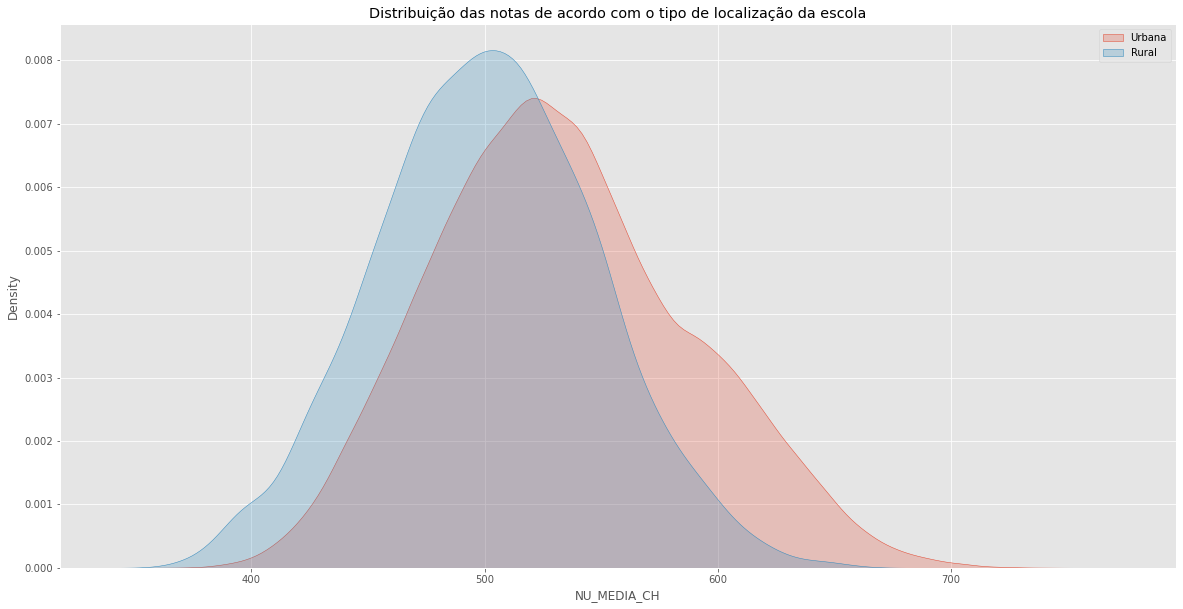

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(df.query("TP_LOCALIZACAO_ESCOLA == 1")['NU_MEDIA_CH'], ax=ax, shade=True, label='Urbana') 
sns.kdeplot(df.query("TP_LOCALIZACAO_ESCOLA == 2")['NU_MEDIA_CH'], ax=ax, shade=True, label='Rural')
ax.set_title('Distribuição das notas de acordo com o tipo de localização da escola') # coloca titulo
ax.legend()
plt.show()

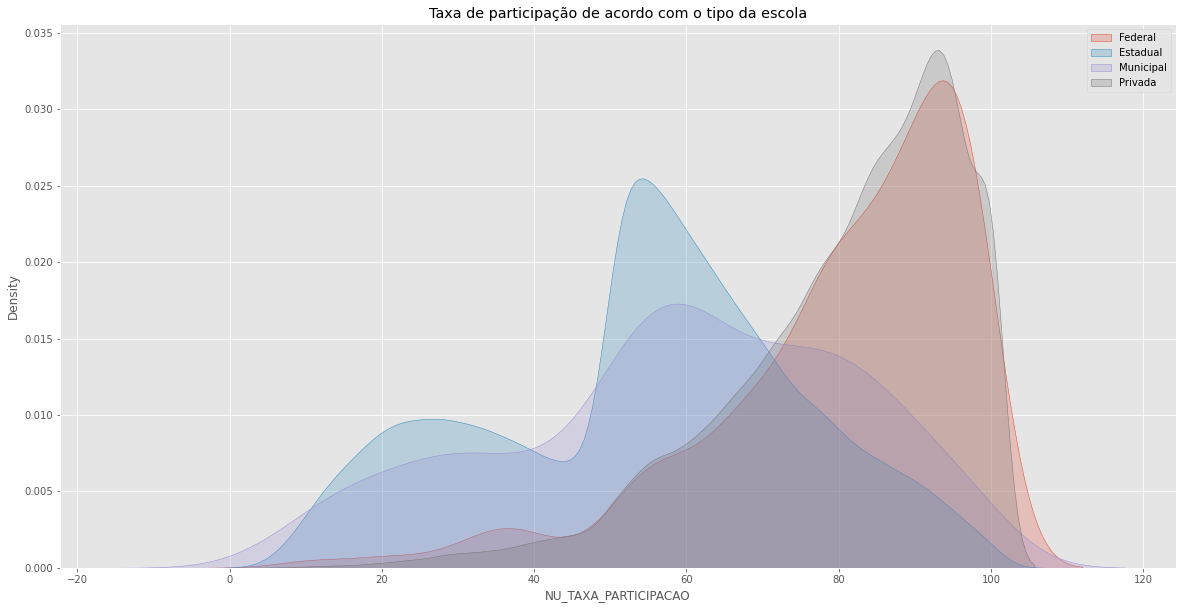

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 1")['NU_TAXA_PARTICIPACAO'], ax=ax, shade=True, label='Federal') 
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 2")['NU_TAXA_PARTICIPACAO'], ax=ax, shade=True, label='Estadual')
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 3")['NU_TAXA_PARTICIPACAO'], ax=ax, shade=True, label='Municipal') 
sns.kdeplot(df.query("TP_DEPENDENCIA_ADM_ESCOLA == 4")['NU_TAXA_PARTICIPACAO'], ax=ax, shade=True, label='Privada') 
ax.set_title('Taxa de participação de acordo com o tipo da escola') # coloca titulo
ax.legend()
plt.show()

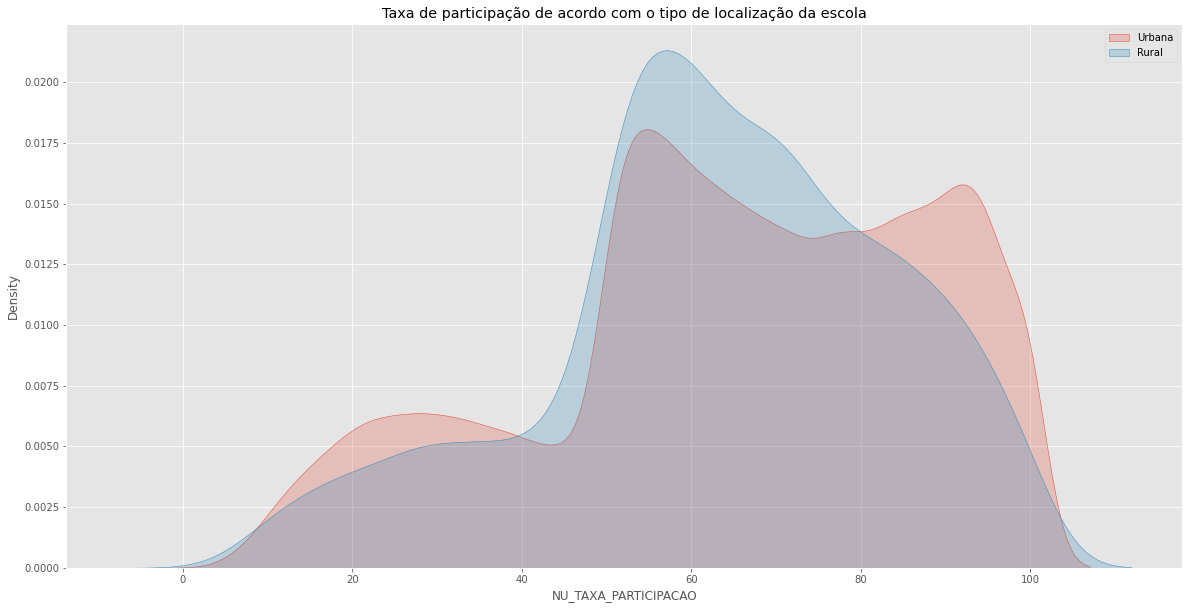

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(df.query("TP_LOCALIZACAO_ESCOLA == 1")['NU_TAXA_PARTICIPACAO'], ax=ax, shade=True, label='Urbana') 
sns.kdeplot(df.query("TP_LOCALIZACAO_ESCOLA == 2")['NU_TAXA_PARTICIPACAO'], ax=ax, shade=True, label='Rural')
ax.set_title('Taxa de participação de acordo com o tipo de localização da escola') # coloca titulo
ax.legend()
plt.show()

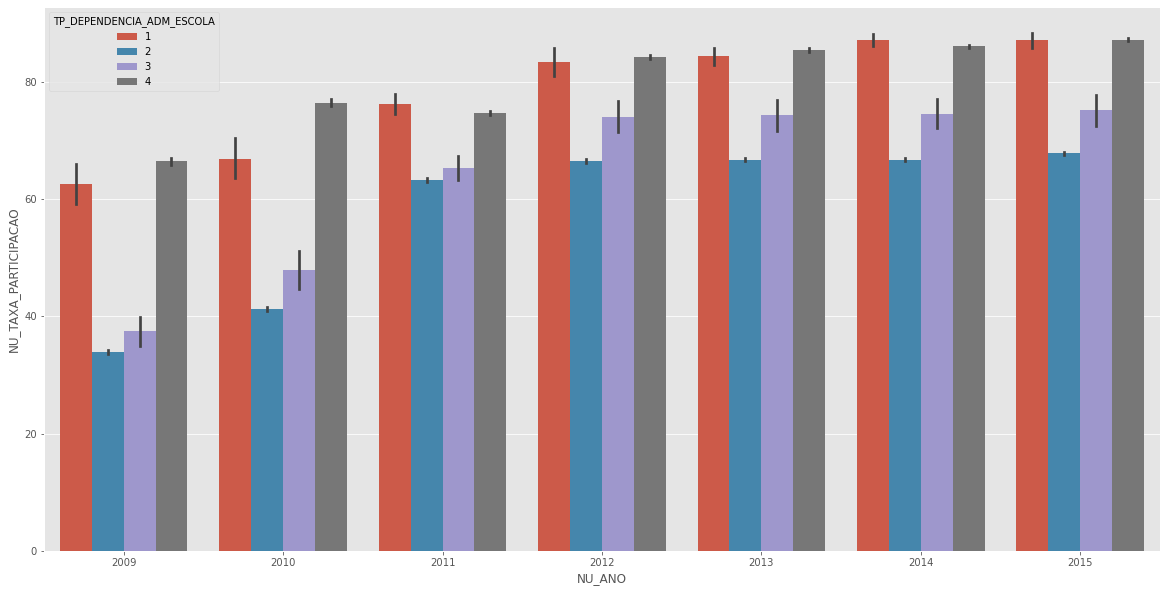

In [51]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=df, x='NU_ANO', y='NU_TAXA_PARTICIPACAO', hue='TP_DEPENDENCIA_ADM_ESCOLA')
plt.show()

In [69]:
def subgrupo(x):
    if any((x =='PE', x =='PB', x =='RN', x =='AL', x =='SE', x =='CE', x =='BA', x =='MA', x =='PI')):
        return 'Nordeste'
    if any((x =='AC', x =='AM', x =='RO', x =='RR', x =='PA', x =='TO', x =='AP')):
        return 'Norte'
    if any((x =='MT', x =='GO', x =='MS', x =='DF')):
        return 'Centro-oeste'
    if any((x =='MG', x =='SP', x =='RJ', x =='ES')):
        return 'Sudeste'
    if any((x =='RS', x =='SC', x =='PR')):
        return 'Sul'

df['SIGLA_REGIOES'] = df['SG_UF_ESCOLA'].apply(subgrupo)

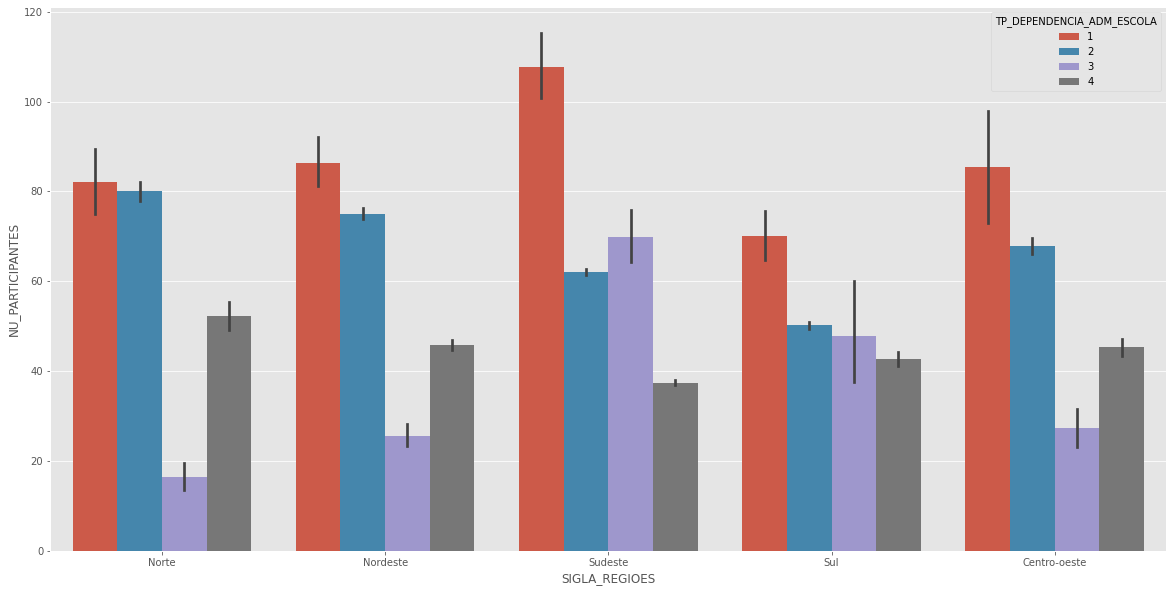

In [84]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=df, x='SIGLA_REGIOES', y='NU_PARTICIPANTES', hue='TP_DEPENDENCIA_ADM_ESCOLA')
plt.show()

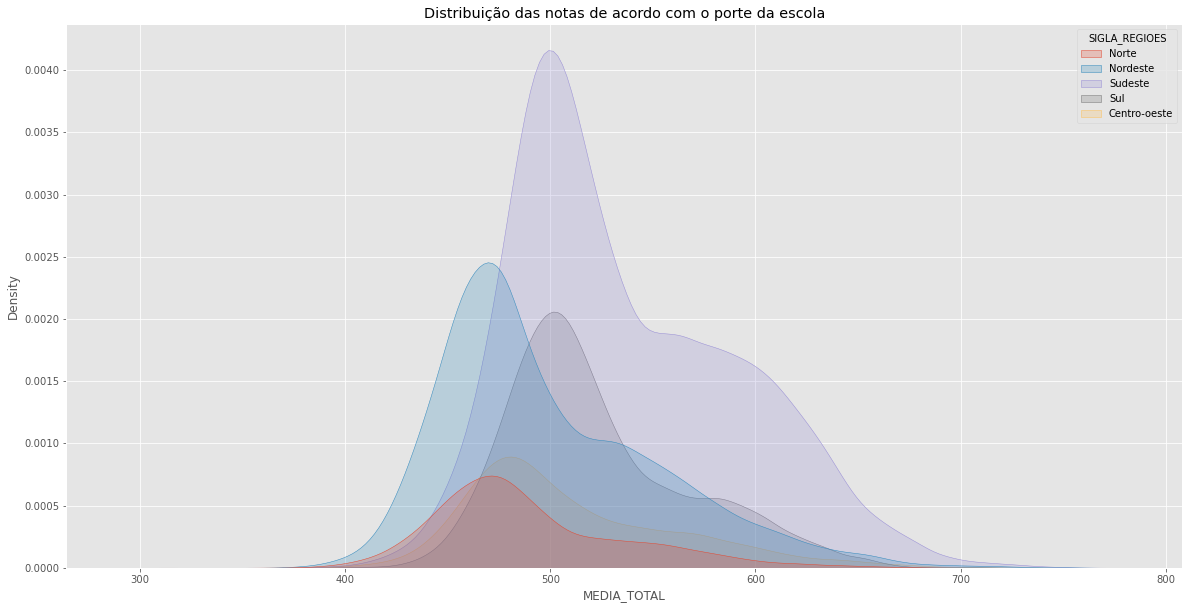

In [114]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.kdeplot(data=df, x='MEDIA_TOTAL', shade=True, hue='SIGLA_REGIOES') 
ax.set_title('Distribuição das notas de acordo com a região da escola') # coloca titulo
plt.show()

In [ ]:
teste1238445545445